# Loading the dataset

In [1]:
import pandas
import numpy as np

df = pandas.read_csv('data.csv', index_col='NUM')

In [2]:
del df["NAME"]
del df["COUNTRY"]

In [3]:
from sklearn.model_selection import train_test_split, KFold, ShuffleSplit, cross_val_score, cross_validate

data, test = train_test_split(
    df,
    test_size = 0.2,
    random_state = 5)

print(data.shape)
print(test.shape)

(41, 6)
(11, 6)


In [4]:
X = data.loc[:,['Mine Annual Production (Million Tonne)',
       'Stripping Ratio', 'Mill Annual Production (Thousand Tonne)',
       'Reserve Mean Grade % Cu EQU.', 'LOM']]
y = data["CAPEX US$ millions"]

test_X = test.loc[:,['Mine Annual Production (Million Tonne)',
       'Stripping Ratio', 'Mill Annual Production (Thousand Tonne)',
       'Reserve Mean Grade % Cu EQU.', 'LOM']]
test_y = test["CAPEX US$ millions"]

In [5]:
num_folds = 6

from sklearn.model_selection import ShuffleSplit

# K-Fold cross validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=6)

# Monte Carlo cross validation
random_splits = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)

for c in random_splits.split(data):
    print(c)


(array([22, 21, 32, 27, 33, 29, 31, 40,  4, 14, 10, 36, 24, 26, 35, 20, 18,
       25,  6, 13,  7, 39,  1, 16,  0, 15,  5, 11,  9,  8, 12, 37]), array([ 3,  2, 23, 38, 17, 28, 19, 34, 30]))
(array([28, 35, 39, 22, 10, 38, 37,  2, 27, 32,  0, 15, 18,  9, 19, 40, 16,
       20, 26, 12, 11, 17, 24,  4, 36, 21,  6,  3,  7, 30,  8, 13]), array([23, 25,  1, 29, 34,  5, 31, 14, 33]))
(array([30, 26, 11,  2, 16,  5,  4,  6, 20, 31,  3, 13, 17,  1, 37, 24,  0,
       14, 35, 28, 40,  7, 25, 36, 15, 23, 10, 34, 32,  8, 38, 19]), array([27, 22, 18, 12, 21,  9, 33, 29, 39]))
(array([15, 14, 16, 34, 26,  6, 29, 21, 37, 31,  2, 30, 19, 38,  9,  1, 12,
        0, 20, 28, 35, 24, 25, 40, 17, 23, 10, 13, 32, 18,  4,  7]), array([39,  3, 22,  8, 27,  5, 36, 33, 11]))
(array([34,  8, 28,  4, 27,  5, 31,  2,  9, 15, 24,  6, 11, 23, 36, 38, 14,
       17, 29, 19, 39,  0,  7, 21, 25, 32, 10, 20, 33, 13, 37, 22]), array([16, 30, 12, 40, 18,  1,  3, 26, 35]))
(array([39, 15,  9, 26,  4, 25, 37, 32, 13,  8, 10

# Metrics

In [6]:
# Metrics:
#   RMSE -> Root Mean Squared Error
#   R2 -> Coefficient of Determination
#   MAE -> Mean Absolute Error
#   APE -> Absolute Error

In [7]:
from sklearn import metrics

def RMSE(model, X, y):
    return metrics.root_mean_squared_error(y,model.predict(X))

def R2(model, X, y):
    return metrics.r2_score(y,model.predict(X))

def MAE(model, X, y):
    return metrics.mean_absolute_error(y,model.predict(X))

def APE(model, X, y):
    return metrics.mean_absolute_percentage_error(y,model.predict(X))


def all_scores(model, X, y):
    return {
        "RMSE": RMSE(model, X, y),
        "R2": R2(model, X, y),
        "MAE": MAE(model, X, y),
        "APE": APE(model, X, y)
    }



# Models

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from pyswarms.single.global_best import GlobalBestPSO
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [9]:
# average the scores for each model
# then use scores for the optimisation algorithms

In [10]:
# ANN
mlp = MLPRegressor(random_state=1, early_stopping=False)
scores = cross_validate(mlp, X, y, cv=random_splits, scoring=all_scores, return_train_score=True)
print("Training Set")
print("RMSE",np.mean(scores["train_RMSE"]))
print("R2",np.mean(scores["train_R2"]))
print("MAE",np.mean(scores["train_MAE"]))
print("APE",np.mean(scores["train_APE"]))
print("Validation Set")
print("RMSE",np.mean(scores["test_RMSE"]))
print("R2",np.mean(scores["test_R2"]))
print("MAE",np.mean(scores["test_MAE"]))
print("APE",np.mean(scores["test_APE"]))


# Hyperparameters to optimise:
#   -max iterations
#   -size of hidden layer
#   -learning rate

Training Set
RMSE 1093.3271240283605
R2 0.5087378732687482
MAE 723.1863246891122
APE 0.34199746452292373
Validation Set
RMSE 1056.9221753630932
R2 0.34536057281741317
MAE 748.3002189152903
APE 0.3506857983061111


In [11]:
# RF
rf = RandomForestRegressor(random_state=1)
scores = cross_validate(rf, X, y, cv=random_splits, scoring=all_scores, return_train_score=True)
print("Training Set")
print("RMSE",np.mean(scores["train_RMSE"]))
print("R2",np.mean(scores["train_R2"]))
print("MAE",np.mean(scores["train_MAE"]))
print("APE",np.mean(scores["train_APE"]))
print("Validation Set")
print("RMSE",np.mean(scores["test_RMSE"]))
print("R2",np.mean(scores["test_R2"]))
print("MAE",np.mean(scores["test_MAE"]))
print("APE",np.mean(scores["test_APE"]))


# Hyperparameters to optimise:
#   -number of estimators
#   -max depth
#   -minimum samples per leaf

dict_keys(['fit_time', 'score_time', 'test_RMSE', 'train_RMSE', 'test_R2', 'train_R2', 'test_MAE', 'train_MAE', 'test_APE', 'train_APE'])
Training Set
RMSE 402.7355082496763
R2 0.9323050101636252
MAE 290.25654687499997
APE 0.16311119792599907
Validation Set
RMSE 1120.9540767572137
R2 0.19394759836556477
MAE 841.3343555555557
APE 0.4650028205284237


In [12]:
# SVM
svr = SVR()

scores = cross_validate(svr, X, y, cv=random_splits, scoring=all_scores, return_train_score=True)
print("Training Set")
print("RMSE",np.mean(scores["train_RMSE"]))
print("R2",np.mean(scores["train_R2"]))
print("MAE",np.mean(scores["train_MAE"]))
print("APE",np.mean(scores["train_APE"]))
print("Validation Set")
print("RMSE",np.mean(scores["test_RMSE"]))
print("R2",np.mean(scores["test_R2"]))
print("MAE",np.mean(scores["test_MAE"]))
print("APE",np.mean(scores["test_APE"]))


Training Set
RMSE 1658.9660960354138
R2 -0.11553897895728588
MAE 1068.0117880006933
APE 0.564871008862003
Validation Set
RMSE 1569.6591601845012
R2 -0.23265393090658193
MAE 1066.6535821860111
APE 0.5711982248807174


In [13]:
# CART Tree (decision tree)
cart = DecisionTreeRegressor()

scores = cross_validate(cart, X, y, cv=random_splits, scoring=all_scores, return_train_score=True)
print("Training Set")
print("RMSE",np.mean(scores["train_RMSE"]))
print("R2",np.mean(scores["train_R2"]))
print("MAE",np.mean(scores["train_MAE"]))
print("APE",np.mean(scores["train_APE"]))
print("Validation Set")
print("RMSE",np.mean(scores["test_RMSE"]))
print("R2",np.mean(scores["test_R2"]))
print("MAE",np.mean(scores["test_MAE"]))
print("APE",np.mean(scores["test_APE"]))

print("Hyperparameters:", cart.get_params())

Training Set
RMSE 0.0
R2 1.0
MAE 0.0
APE 0.0
Validation Set
RMSE 1430.3229056753598
R2 -0.5474758413342664
MAE 1038.5677777777778
APE 0.5366952712637929
Hyperparameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


# Hyperparameter Optimisation

In [14]:
def testANN(param):
    # max iterations
    # size of layers
    # number of hidden layers
    # learning rate (Scale??)
    mlp = MLPRegressor(max_iter=round(param[0]), hidden_layer_sizes=[round(param[1]) for _ in range(round(param[2]))], learning_rate_init=param[3],random_state=1, early_stopping=False)
    scores = cross_validate(mlp, X, y, cv=random_splits, scoring=all_scores, return_train_score=True)
    return np.mean(scores["test_APE"])-np.mean(scores["test_R2"])

def testRF(param):
    # number of estimators
    # max depth
    # minimum samples per leaf
    rf = RandomForestRegressor(n_estimators=round(param[0]), max_depth=round(param[1]), min_samples_leaf=round(param[2]))
    scores = cross_validate(rf, X, y, cv=random_splits, scoring=all_scores, return_train_score=True)
    return np.mean(scores["test_APE"])-np.mean(scores["test_R2"])

def testSVR(param):
    # C
    # epsilon?
    svr = SVR(C=param[0], epsilon=param[1])
    scores = cross_validate(svr, X, y, cv=random_splits, scoring=all_scores, return_train_score=True)
    return np.mean(scores["test_APE"])-np.mean(scores["test_R2"])

def testDT(param):#CART Tree
    # max depth
    # minimum samples per leaf
    dt = DecisionTreeRegressor(max_depth=round(param[0]), min_samples_leaf=round(param[1]))
    scores = cross_validate(dt, X, y, cv=random_splits, scoring=all_scores, return_train_score=True)
    return np.mean(scores["test_APE"])-np.mean(scores["test_R2"])


def optimiseModel(params, modelfunc=testRF):
    out = np.array([modelfunc(param) for param in params])
    return out

In [15]:

bounds = (np.array([10,  2,  1]),
          np.array([100, 15, 10]))
# bounds:
#   upper + lower bounds of parameter values to test
#   format -> (np array of upper bounds,
#              np array of lower bounds)

options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}# i think just keep these the same
optimizer = GlobalBestPSO(n_particles=10, dimensions=3, options=options, bounds=bounds)# dimensions = number of parameters to optimise

cost, pos = optimizer.optimize(optimiseModel, 100, verbose=True, modelfunc=testRF) #change this to optimise different models (e.g. testRF, testSVR, testDT)

print(cost)
print("optimal parameters: ",pos)

# could use multiprocessing to speed it up, but then can't use ipynb

2024-05-11 12:33:57,967 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|10/10, best_cost=0.205
2024-05-11 12:36:17,907 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.20498160153199074, best pos: [35.09811018 12.37545063  3.96609427]


0.20498160153199074
optimal parameters:  [35.09811018 12.37545063  3.96609427]


In [16]:
np.save("pos_history",np.array(optimizer.pos_history))

2024-05-11 12:36:18,362 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.ImageMagickWriter'>
2024-05-11 12:36:18,363 - matplotlib.animation - INFO - MovieWriter._run: running command: 'C:\Program Files\ImageMagick-7.1.1-Q16-HDRI\magick.exe' -size 1000x800 -depth 8 -delay 10.0 -loop 0 rgba:- -layers OptimizePlus plot2.gif


10
(5, 3)
[[19.86495121  8.19292737  8.20004003]
 [31.53397554  9.63595461  8.65558358]
 [21.39240956  6.6064396   1.5986544 ]
 [29.85605156 13.21370245  7.45389402]
 [43.79121248 11.60752692  3.73592419]]
10
(5, 2)
[[19.86495121  8.20004003]
 [31.53397554  8.65558358]
 [21.39240956  1.5986544 ]
 [29.85605156  7.45389402]
 [43.79121248  3.73592419]]


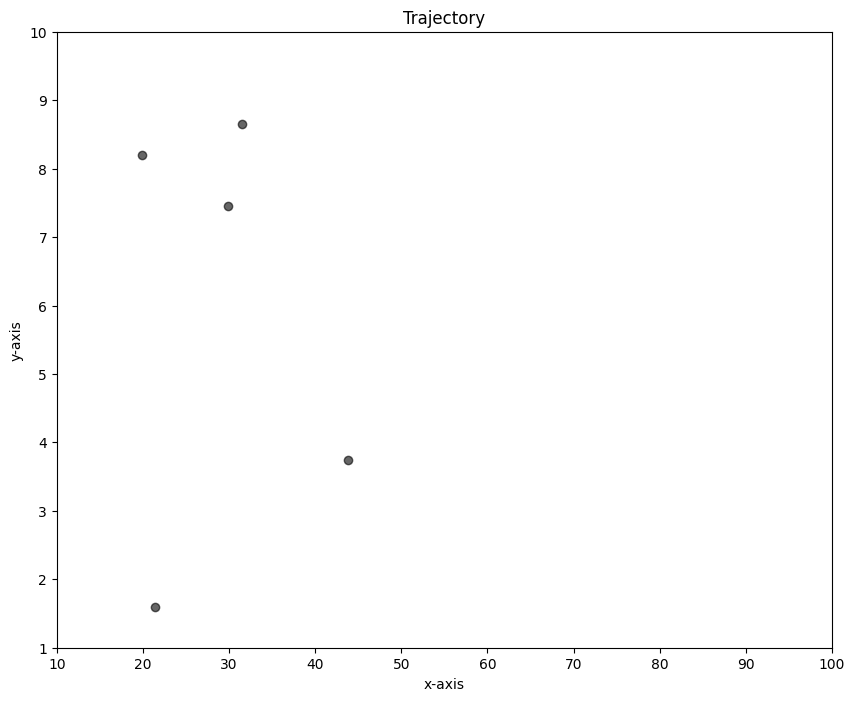

In [17]:
# NEXT: try plotting optimisation
from pyswarms.utils.plotters.plotters import plot_contour
from pyswarms.utils.plotters.formatters import Designer
import matplotlib.animation as animation
from matplotlib import pyplot as plt
from IPython.display import Image

print(len(optimizer.pos_history))
print(optimizer.pos_history[0].shape)

print(optimizer.pos_history[0][:5])

pos_history = []
for pos_list in optimizer.pos_history:
    pos_history.append(np.delete(pos_list,1,1))


print(len(pos_history))
print(pos_history[0].shape)
print(pos_history[0][:5])

anim = plot_contour(pos_history, designer=Designer(limits=[(10,100),(1,10)]))

anim.save('plot.gif', writer='imagemagick', fps=10)


# Testing

In [18]:
mlp = MLPRegressor(random_state=1, early_stopping=False)
mlp.fit(X,y)
print(RMSE(mlp,test_X,test_y))
print(R2(mlp,test_X,test_y))
print(MAE(mlp,test_X,test_y))
print(APE(mlp,test_X,test_y))
print()
mlp = MLPRegressor(max_iter=400, hidden_layer_sizes=(20), learning_rate_init=0.060, random_state=1, early_stopping=False)
mlp.fit(X,y)
print(RMSE(mlp,test_X,test_y))
print(R2(mlp,test_X,test_y))
print(MAE(mlp,test_X,test_y))
print(APE(mlp,test_X,test_y))

1222.018073909118
0.0665409337582008
869.5315300733723
0.24895192297561006

1102.1233378718625
0.24072269778706246
726.5522119035869
0.21405864966054391


In [22]:
rf = RandomForestRegressor(random_state=1)
rf.fit(X,y)
print(RMSE(rf,test_X,test_y))
print(R2(rf,test_X,test_y))
print(MAE(rf,test_X,test_y))
print(APE(rf,test_X,test_y))
print()
rf = RandomForestRegressor(n_estimators=25, min_samples_leaf=2, random_state=1)
rf.fit(X,y)
print(RMSE(rf,test_X,test_y))
print(R2(rf,test_X,test_y))
print(MAE(rf,test_X,test_y))
print(APE(rf,test_X,test_y))

# 1066.4582939848565
# 0.2890684762167608
# 842.6954545454545
# 0.26648501637734123

# 1013.6850222113999
# 0.357687936397748
# 706.7963564213563
# 0.21396075334556264


1066.4582939848565
0.2890684762167608
842.6954545454545
0.26648501637734123

985.171495305571
0.39331438890479975
682.1335382395382
0.207260656451822


To add later on if time:  
-preprocessing (outliers, etc.)  
-ensemble methods (ANN + SVM)